<a href="https://colab.research.google.com/github/cgiray/project/blob/main/src/GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/UNSW-ZZSC9020/project/blob/main/src/GoogleColab.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Welcome to ZZSC9020

This Python notebook shows how to clone the course GitHub repository on Google Colab.

You can develop your data analysis on Google Colab without downloading the data to your computer.

## Clone Repo

In [1]:
# Clone the ZZSC9020 project repository from GitHub
!git clone https://github.com/UNSW-ZZSC9020/project.git

Cloning into 'project'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 77 (delta 14), reused 12 (delta 12), pack-reused 55 (from 1)
Receiving objects: 100% (77/77), 197.08 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (17/17), done.


In [2]:
# Create a data folder
!mkdir -p data
# Joint forecastdemand_nsw files into a single file.
!cat project/data/NSW/forecastdemand_nsw.csv.zip.part* > data/forecastdemand_nsw.csv.zip

In [3]:
# Unzip the data files into the data folder
!unzip data/forecastdemand_nsw.csv.zip -d data
!unzip project/data/NSW/temperature_nsw.csv.zip -d data
!unzip project/data/NSW/totaldemand_nsw.csv.zip -d data

# Remove forecastdemand_nsw.csv.zip
!rm data/forecastdemand_nsw.csv.zip

Archive:  data/forecastdemand_nsw.csv.zip
  inflating: data/forecastdemand_nsw.csv  
Archive:  project/data/NSW/temperature_nsw.csv.zip
  inflating: data/temperature_nsw.csv  
Archive:  project/data/NSW/totaldemand_nsw.csv.zip
  inflating: data/totaldemand_nsw.csv  


## Data and Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
temp = pd.read_csv('data/temperature_nsw.csv')
demand = pd.read_csv('data/totaldemand_nsw.csv')
forecast = pd.read_csv('data/forecastdemand_nsw.csv')

## Exploration

In [30]:
temp.head()

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6


In [31]:
demand.head()

,DATETIME,TOTALDEMAND,REGIONID
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1


In [33]:
forecast

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49,2010-01-01
1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43,2010-01-01
2,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36,2010-01-01
3,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44,2010-01-01
4,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35,2010-01-01
...,...,...,...,...,...,...
10906014,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18
10906015,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18
10906016,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18
10906017,2021031739,NSW1,2,7087.28,2021-03-17 23:01:36,2021-03-18


In [21]:
df1 = pd.merge(temp, demand, on='DATETIME', how='inner')
df1.drop(columns=['LOCATION', 'REGIONID'], inplace=True)

In [24]:
# Convert DATETIME in df1 with dayfirst=True
df1['DATETIME'] = pd.to_datetime(df1['DATETIME'], dayfirst=True)

# Convert DATETIME in forecast to ensure it's in datetime format (if not already)
forecast['DATETIME'] = pd.to_datetime(forecast['DATETIME'])

# Now merge the DataFrames on DATETIME
data = pd.merge(df1, forecast, on='DATETIME')

data.drop(columns=['PREDISPATCHSEQNO','REGIONID','PERIODID','LASTCHANGED'], inplace=True)

# Remove duplicate rows from the 'data' DataFrame
data = data.drop_duplicates()

# Display the number of rows and the first few rows of the DataFrame after removing duplicates
print(f"Number of rows after removing duplicates: {len(data)}")
print(data.head())






Number of rows after removing duplicates: 10743979
    DATETIME  TEMPERATURE  TOTALDEMAND  FORECASTDEMAND
0 2010-01-01         23.1       8038.0         7832.04
2 2010-01-01         23.1       8038.0         7832.03
4 2010-01-01         23.1       8038.0         7830.96
5 2010-01-01         23.1       8038.0         7842.03
6 2010-01-01         23.1       8038.0         7841.08


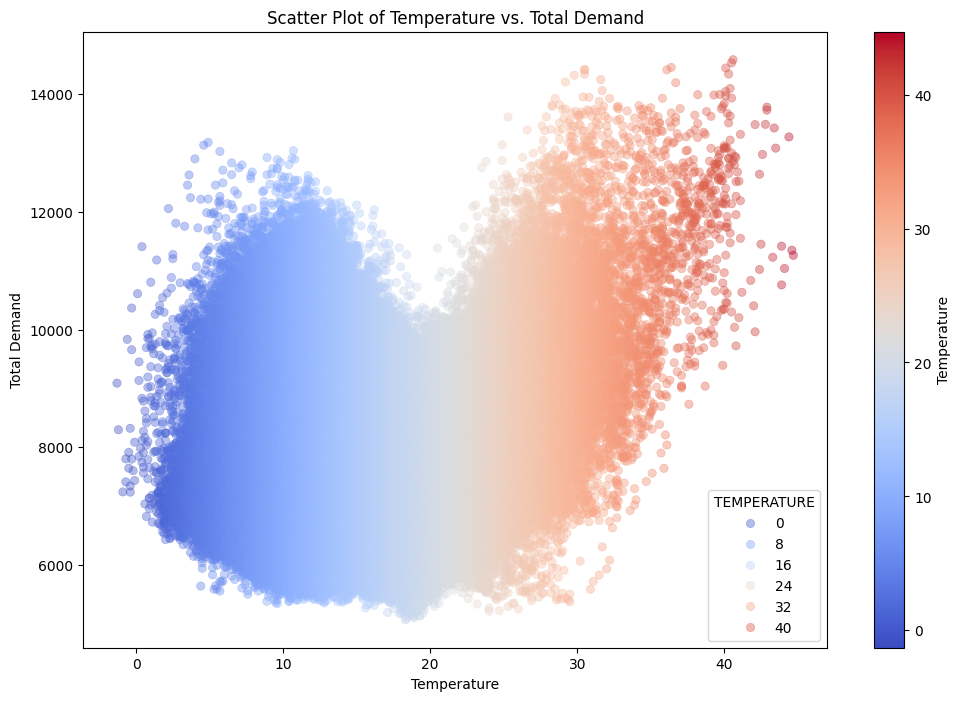

In [11]:
plt.figure(figsize=(12, 8))

# Create scatter plot
scatter = sns.scatterplot(
    data=df1,
    x='TEMPERATURE',
    y='TOTALDEMAND',
    hue='TEMPERATURE',
    palette='coolwarm',
    edgecolor=None,
    alpha=0.4
)

# Create a color bar manually
norm = mcolors.Normalize(vmin=df1['TEMPERATURE'].min(), vmax=df1['TEMPERATURE'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # We don't need to set data for the colorbar

# Add color bar to the plot
cbar = plt.colorbar(sm, ax=scatter.axes)
cbar.set_label('Temperature')

# Customizing the plot
plt.title('Scatter Plot of Temperature vs. Total Demand')
plt.xlabel('Temperature')
plt.ylabel('Total Demand')
plt.show()


In [12]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906019 entries, 0 to 10906018
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
 4   LASTCHANGED       object 
 5   DATETIME          object 
dtypes: float64(1), int64(2), object(3)
memory usage: 499.2+ MB


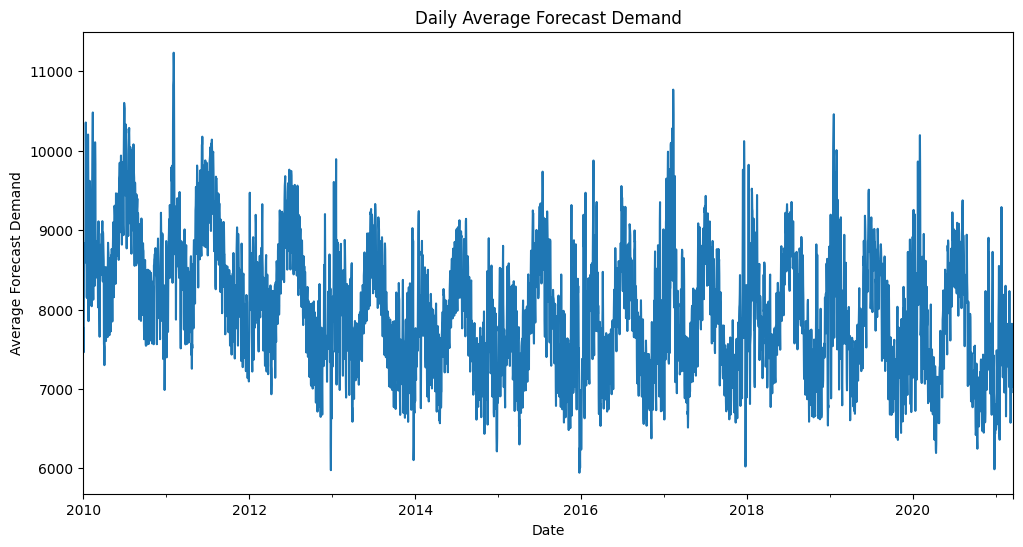

In [13]:
df2 = forecast.copy()

# Ensure the DATETIME column is converted to datetime if it hasn't been already
df2['DATETIME'] = pd.to_datetime(df2['DATETIME'])

# Set DATETIME as the index
df2.set_index('DATETIME', inplace=True)

# Now perform the resampling
daily_agg = df2.resample('D')['FORECASTDEMAND'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
daily_agg.plot()
plt.title('Daily Average Forecast Demand')
plt.xlabel('Date')
plt.ylabel('Average Forecast Demand')
plt.show()

# Visuals on DATA

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


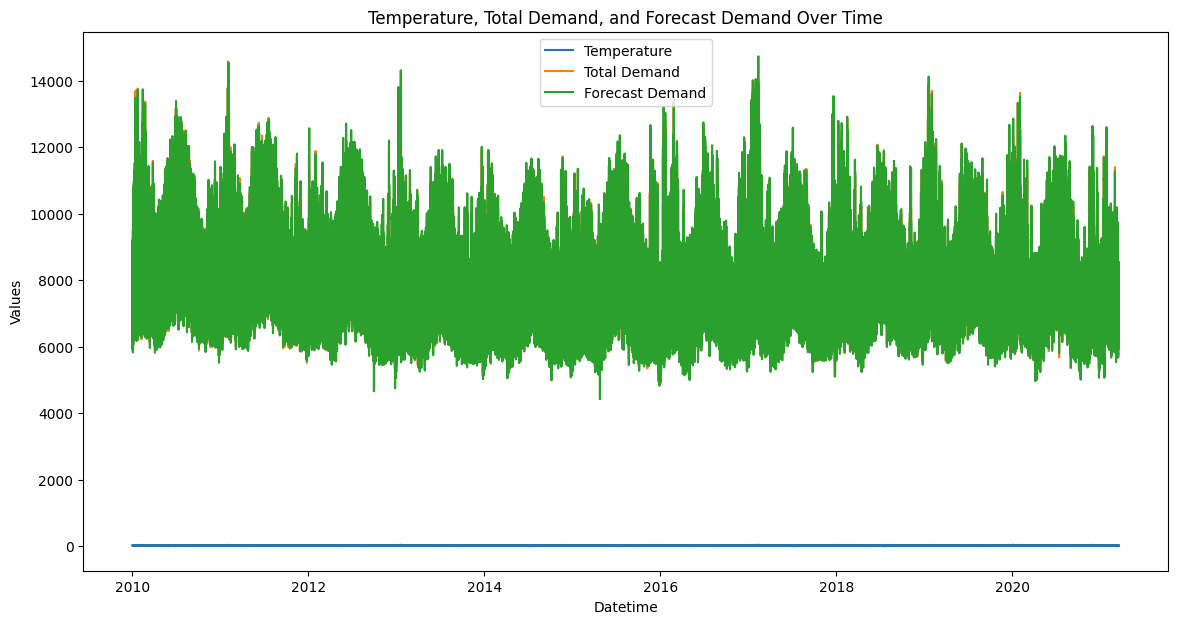

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data['DATETIME'], data['TEMPERATURE'], label='Temperature')
plt.plot(data['DATETIME'], data['TOTALDEMAND'], label='Total Demand')
plt.plot(data['DATETIME'], data['FORECASTDEMAND'], label='Forecast Demand')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Temperature, Total Demand, and Forecast Demand Over Time')
plt.legend()
plt.show()


In [26]:
plt.figure(figsize=(14, 7))
plt.scatter(data['TEMPERATURE'], data['TOTALDEMAND'], alpha=0.5, label='Total Demand')
plt.scatter(data['TEMPERATURE'], data['FORECASTDEMAND'], alpha=0.5, label='Forecast Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Scatter Plot of Temperature vs Demand')
plt.legend()
plt.show()


KeyboardInterrupt: 